In [1]:
import requests

api_endpoint = 'https://openexchangerates.org/api/latest.json?app_id=042976e8e40745ef883cfc9d015e0bdb'

response = requests.get(api_endpoint)

if response.status_code == 200:
    api_data = response.json()
    jpy_per_1_usd = int(api_data['rates']['JPY'])
    thb_per_1_usd = int(api_data['rates']['THB'])

    one_thb_to_jpy = jpy_per_1_usd / thb_per_1_usd
    one_jpy_to_thb = 1 / one_thb_to_jpy
    print("thb to jpy", one_thb_to_jpy)
    print("jpy to thb", one_jpy_to_thb)

    
else:
    print(f"Error: Unable to fetch data from the API. Status code: {response.status_code}")

thb to jpy 4.228571428571429
jpy to thb 0.23648648648648649


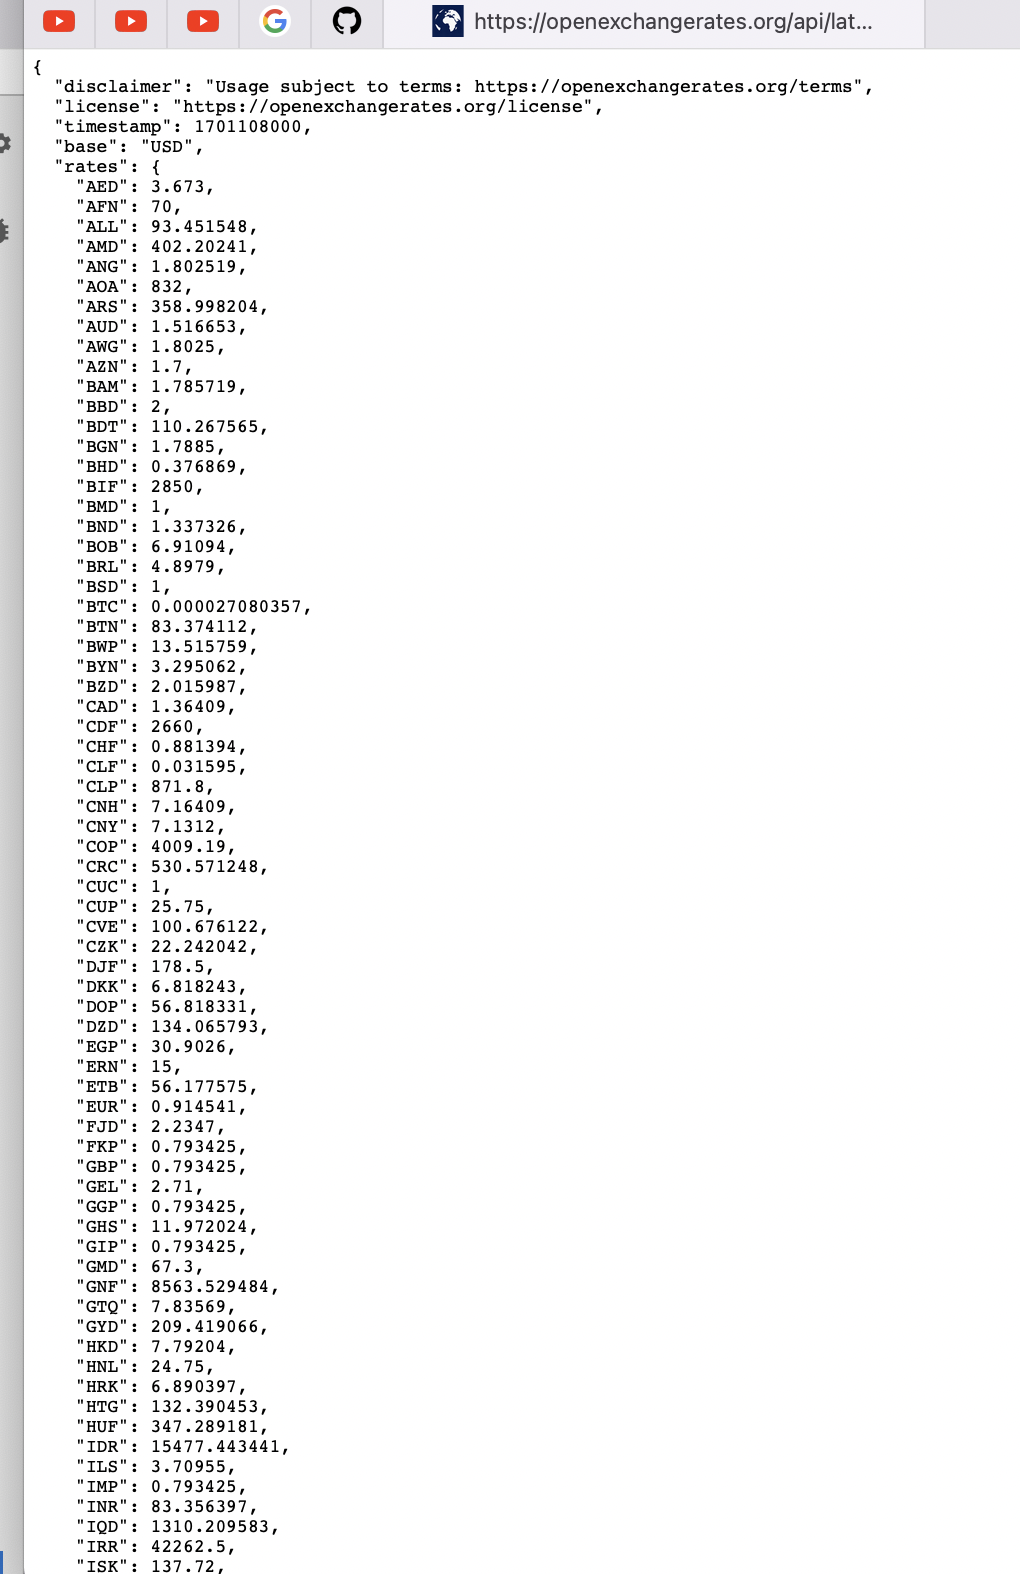

In [2]:
# pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [3]:
# !pip install ezsheets
from datetime import datetime
import ezsheets

sheet = ezsheets.Spreadsheet('1j9R0dvNIIVQyBBMHjEySVySrEwy7wxsH6LrgDz0Zfe0')

print("Title of This Sheet is = ", sheet.title)

# s1 = sheet['Sheet1']
# s1.get('B1')

# sheet.sheetTitles

current_month = datetime.now().strftime("%B")
current_month

Title of This Sheet is =  ExchangeRateTHBJYP


'November'

In [4]:
currentMonthSheet = sheet[current_month]

In [5]:
long_now = datetime.now()
today = long_now.date()
hour = long_now.hour
mnt = long_now.minute
# mnt

timestr = "{}-{}-{} {}:{}".format(
      long_now.strftime("%d"),
      long_now.strftime("%m"),
      long_now.strftime("%Y"),
      long_now.strftime("%H"),
      long_now.strftime("%M"),
      )
print(timestr)

28-11-2023 06:15


In [6]:
currentMonthSheet = sheet[current_month]
currentMonthSheet.get("A1")

'day'

In [7]:
"5-12-2555".count("-")

2

In [8]:
import calendar
from datetime import datetime

def isEndOfMonth(d, m, y):
    input_dt = datetime(y, m, d)
    # input_dt = datetime(2022, 2, 13)
    # print("The original date is:", input_dt.date())
    # monthrange() to gets the date range
    # year = 2022, month = 9
    res = calendar.monthrange(input_dt.year, input_dt.month)
    lastDay = res[1]
    return lastDay == datetime.today().day

isEndOfMonth(30, 11, 2023)

False

In [9]:
def getStrCurrentDate():
    now = datetime.now()
    datestr = f"{now.day}-{now.month}-{now.year}"
    return datestr

In [10]:
def findCurrentDateRowIndex():
    datecolumn_list = currentMonthSheet.getColumn(1)

    datestr = getStrCurrentDate()


    last_found_dateformat_row_index = -1
    # isFoundDate = False
    for j, entrydate in enumerate(datecolumn_list, 1):
        if entrydate.count("-") == 2:
            last_found_dateformat_row_index = j
        # "".count()
        # print(entrydate, "<--------->", datestr)
        if datestr.lower() == entrydate.lower():
            return j, datestr
            # isFoundDate = True
    # return last_found_dateformat_row_index
    now = datetime.now()
    
    last_found_dateformat_row_index += 2
    currentMonthSheet[1, last_found_dateformat_row_index] = datestr
    currentMonthSheet[2, last_found_dateformat_row_index] = 'thb to jyp'
    currentMonthSheet[2, last_found_dateformat_row_index + 1] = 'jyp to thb'
    
    if isEndOfMonth(now.day, now.month, now.year):
        # create new date on new month
        # last_found_dateformat_row_index += 2
        createNewSheetWithSettingFirstDate(
            currentMonthSheet.getRow(1),
              now.strftime("%B"),
            datestr
        )
        # currentMonthSheet[1, last_found_dateformat_row_index] = datestr
        
    return -1, 'error not found today date on datasheet in column A-? => created new date to sheet at row index = ' + str(last_found_dateformat_row_index)
            
findCurrentDateRowIndex()

(2, '28-11-2023')

In [11]:
def findCurrentColumnIndexHrMnt():
    # rowIndex, daytoday = findCurrentDateRowIndex()
    
    timeHrMnts = currentMonthSheet.getRow(1)

    now = datetime.now()
    hrnow = now.hour
    # print(hrnow)

    columnCurrentHrMnt = -1
    isFoundHrMnt = False
    for j, timeHrMnts in enumerate(timeHrMnts, 1):
        # print(entrydate, "<--------->", datestr)
        entryhr = timeHrMnts.split(":")[0]
        ...
        if entryhr.lower() == str(hrnow).lower():
            return j, "found hr at column " + str(j)
        # if .lower() == entrydate.lower():
        #     isFoundDate = True

findCurrentColumnIndexHrMnt()

(9, 'found hr at column 9')

In [12]:
    
# def createNewTimeStampWithCurrencyData():
def createNewSheetWithSettingFirstDate(firstRow, newMonthName, startDateStr):
    global currentMonthSheet
    # currentMonthSheet.refresh()
    print("START NEW MONTH : ", newMonthName)
    currentMonthSheet.spreadsheet.createSheet(title=newMonthName)
    # currentMonthSheet.
    currentMonthSheet = sheet[newMonthName]
    print(firstRow)
    
    currentMonthSheet.updateRow(1, firstRow)
    currentMonthSheet[1, 2] = startDateStr
    currentMonthSheet[2, 2] = 'thb to jyp'
    currentMonthSheet[2, 3] = 'jyp to thb'

    


In [17]:
rowIndex, rowdate = findCurrentDateRowIndex()
colIndex, colHr = findCurrentColumnIndexHrMnt()
if rowIndex == -1:
    print("Error row data not found")
    print(rowdate)
else: # success found row
    if colIndex == -1:
        print("Erro col data not found")
        print(colHr)
    else: # success both row & col
        print("Writting data to sheet")
        # for thb to jyp
        currentMonthSheet[colIndex, rowIndex] = one_thb_to_jpy
        # for jpy to thb
        currentMonthSheet[colIndex, rowIndex + 1] = one_jpy_to_thb

Writting data to sheet


In [14]:
createNewSheetWithSettingFirstDate(
    currentMonthSheet.getRow(1),
      # datetime.now().strftime("%B"),
    "TestMonth",
    "1-12-2023"
)

START NEW MONTH :  TestMonth
['day', '', '0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '', '']
